In [2]:
import os
os.chdir(r'G:\upes\sem 3\Major Project\Dataset\Landslide_Detection')

C:\Users\DELL\AppData\Local\Temp\ipykernel_9740\3461969578.py:27: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red, np.add(data_nir, data_red))


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 621ms/step


Text(0.5, 1.0, 'Input Image')

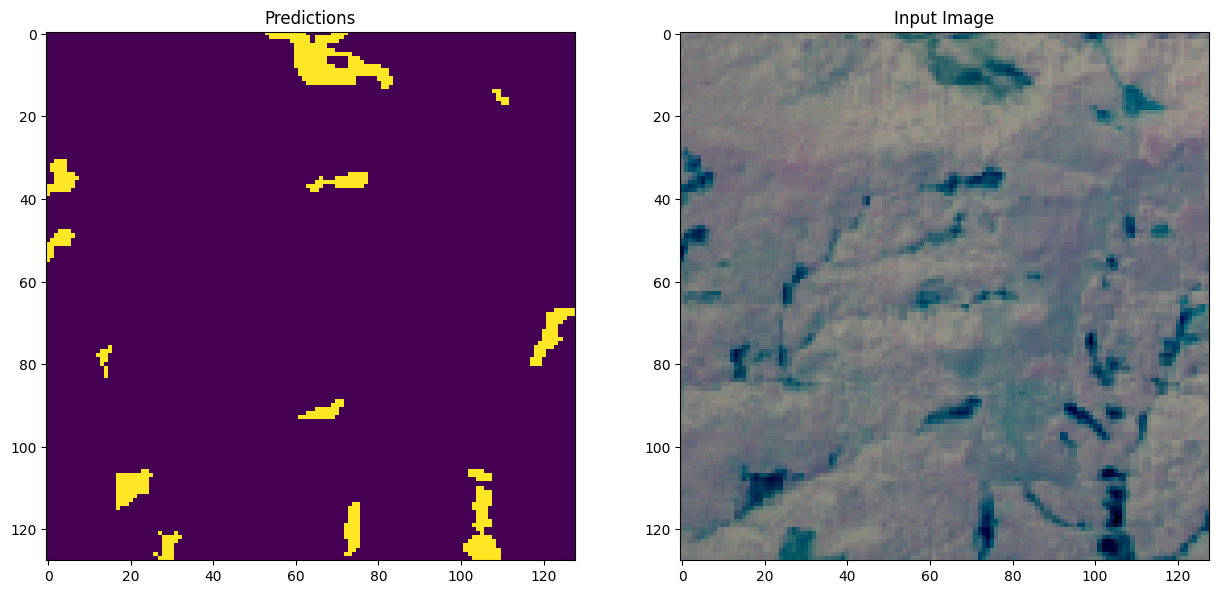

In [3]:
import tensorflow as tf
import numpy as np
import h5py
import matplotlib.pyplot as plt
import glob  # Import glob module to search for files
from utils import recall_m, precision_m, f1_m  # Ensure utils.py is available

# Load the trained model
model = tf.keras.models.load_model("model_save.h5", custom_objects={"f1_m": f1_m, "precision_m": precision_m, "recall_m": recall_m})

# Load the satellite image data (e.g., validation set or any new image)
validation_url = r'Data/validation/img/*.h5'
img_val = sorted(glob.glob(validation_url))  # Use glob to find all matching files

VAL_XX = np.zeros((len(img_val), 128, 128, 6))  # Assuming 128x128x6 shape for input images
for i, img in enumerate(img_val):
    with h5py.File(img) as hdf:
        data = np.array(hdf.get('img'))
        
        # Preprocess data as you did during training
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0
        
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red, np.add(data_nir, data_red))
        
        VAL_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  # RED
        VAL_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb  # GREEN
        VAL_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb  # BLUE
        VAL_XX[i, :, :, 3] = data_ndvi  # NDVI
        VAL_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope  # SLOPE
        VAL_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation  # ELEVATION

# Make predictions
threshold = 0.5
pred_img = model.predict(VAL_XX)
pred_img = (pred_img > threshold).astype(np.uint8)

# Visualize the prediction for an example image
img = 12
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(VAL_XX[img, :, :, 0:3])
ax2.set_title('Input Image')


Text(0.5, 1.0, 'Input Image')

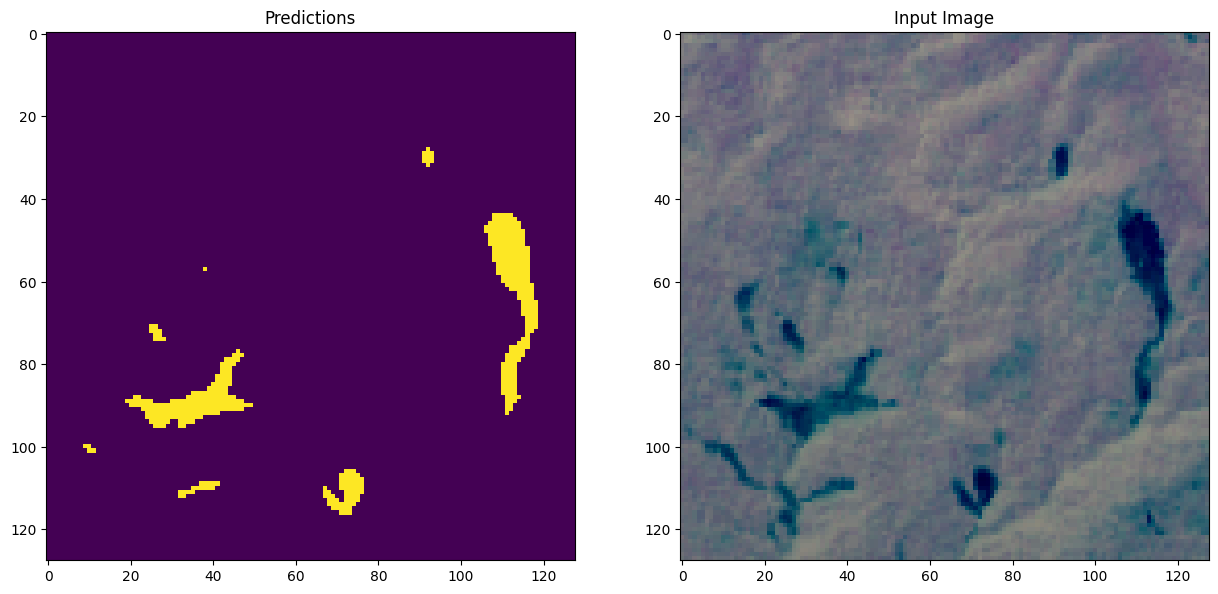

In [6]:
img = 1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(VAL_XX[img, :, :, 0:3])
ax2.set_title('Input Image')

Text(0.5, 1.0, 'Input Image')

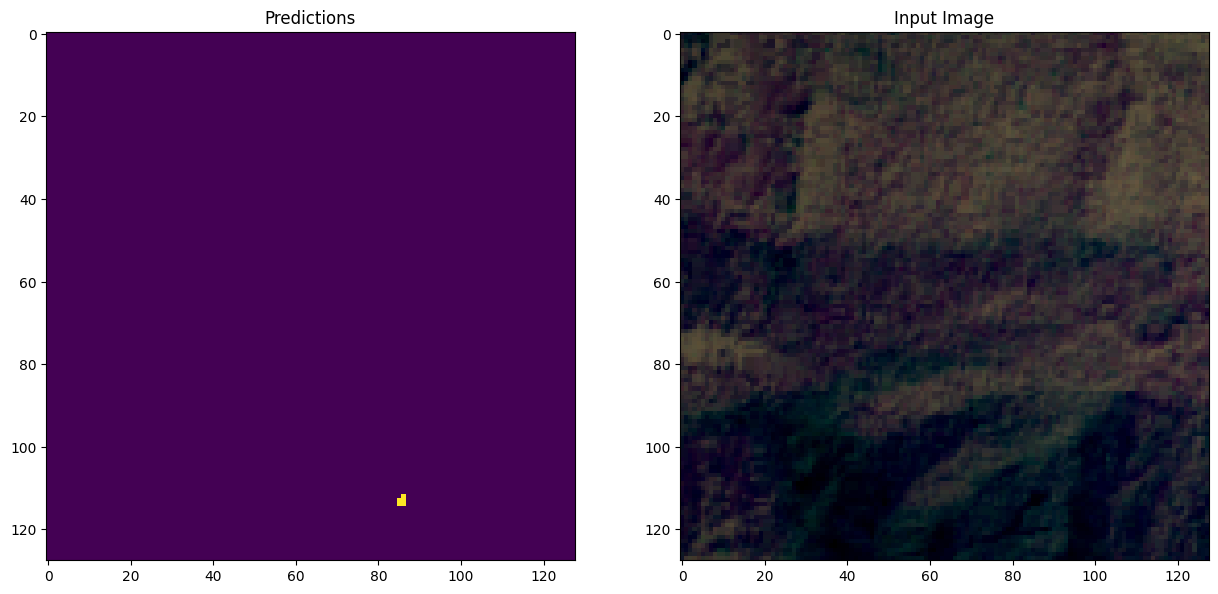

In [7]:
img = 15
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(VAL_XX[img, :, :, 0:3])
ax2.set_title('Input Image')

Text(0.5, 1.0, 'Input Image')

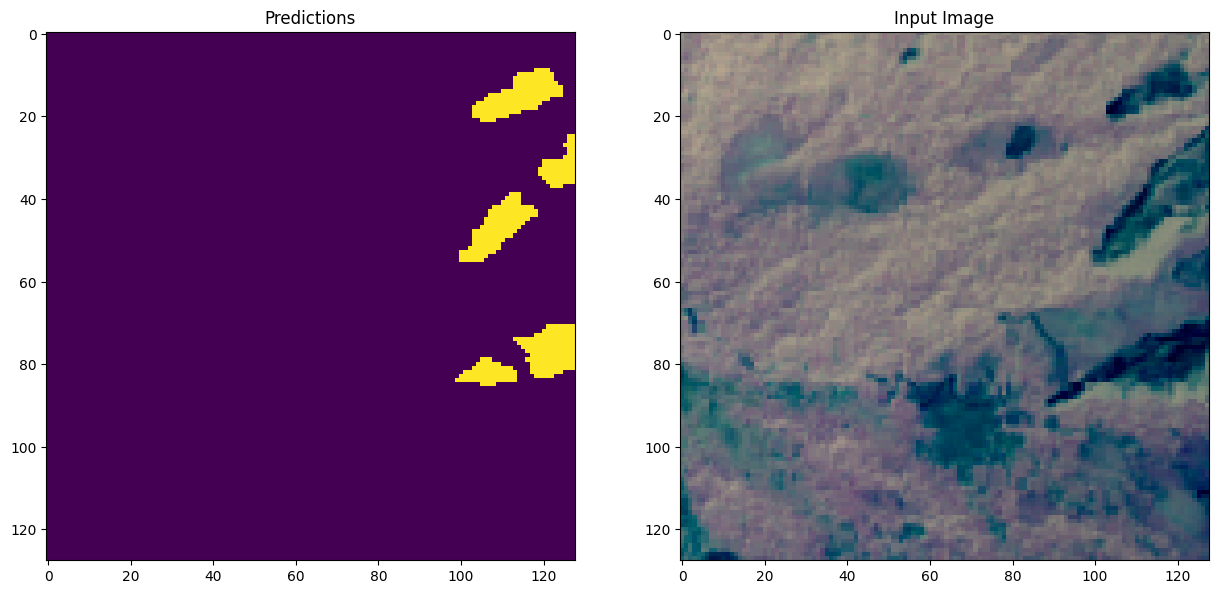

In [8]:
img = 22
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(VAL_XX[img, :, :, 0:3])
ax2.set_title('Input Image')